In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.datasets import load_boston

import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

plt.style.use('ggplot')

['NanumGothic']


In [2]:
df = pd.read_csv('~/dropbox/python숙달/data/depp/cars.csv')

In [3]:
df.corr()

,"# ""speed""",dist
"# ""speed""",1.000000,0.806895
dist,0.806895,1.000000


CRIM: 범죄율 INDUS: 비소매상업지역 면적 비율 NOX: 일산화질소 농도 RM: 주택당 방 수 LSTAT: 인구 중 하위 계층 비율 B: 인구 중 흑인 비율 PTRATIO: 학생/교사 비율 ZN: 25,000 평방피트를 초과 거주지역 비율 CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0 AGE: 1940년 이전에 건축된 주택의 비율 RAD: 방사형 고속도로까지의 거리 DIS: 직업센터의 거리 TAX: 재산세율

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
df_Boston = pd.DataFrame(boston.data, columns= boston.feature_names)
df_Boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df_Boston['target']= boston.target

In [8]:
# 선형회귀에서 1. 상관관게, 2. 정규화, 3. 다중공선성
df_Boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


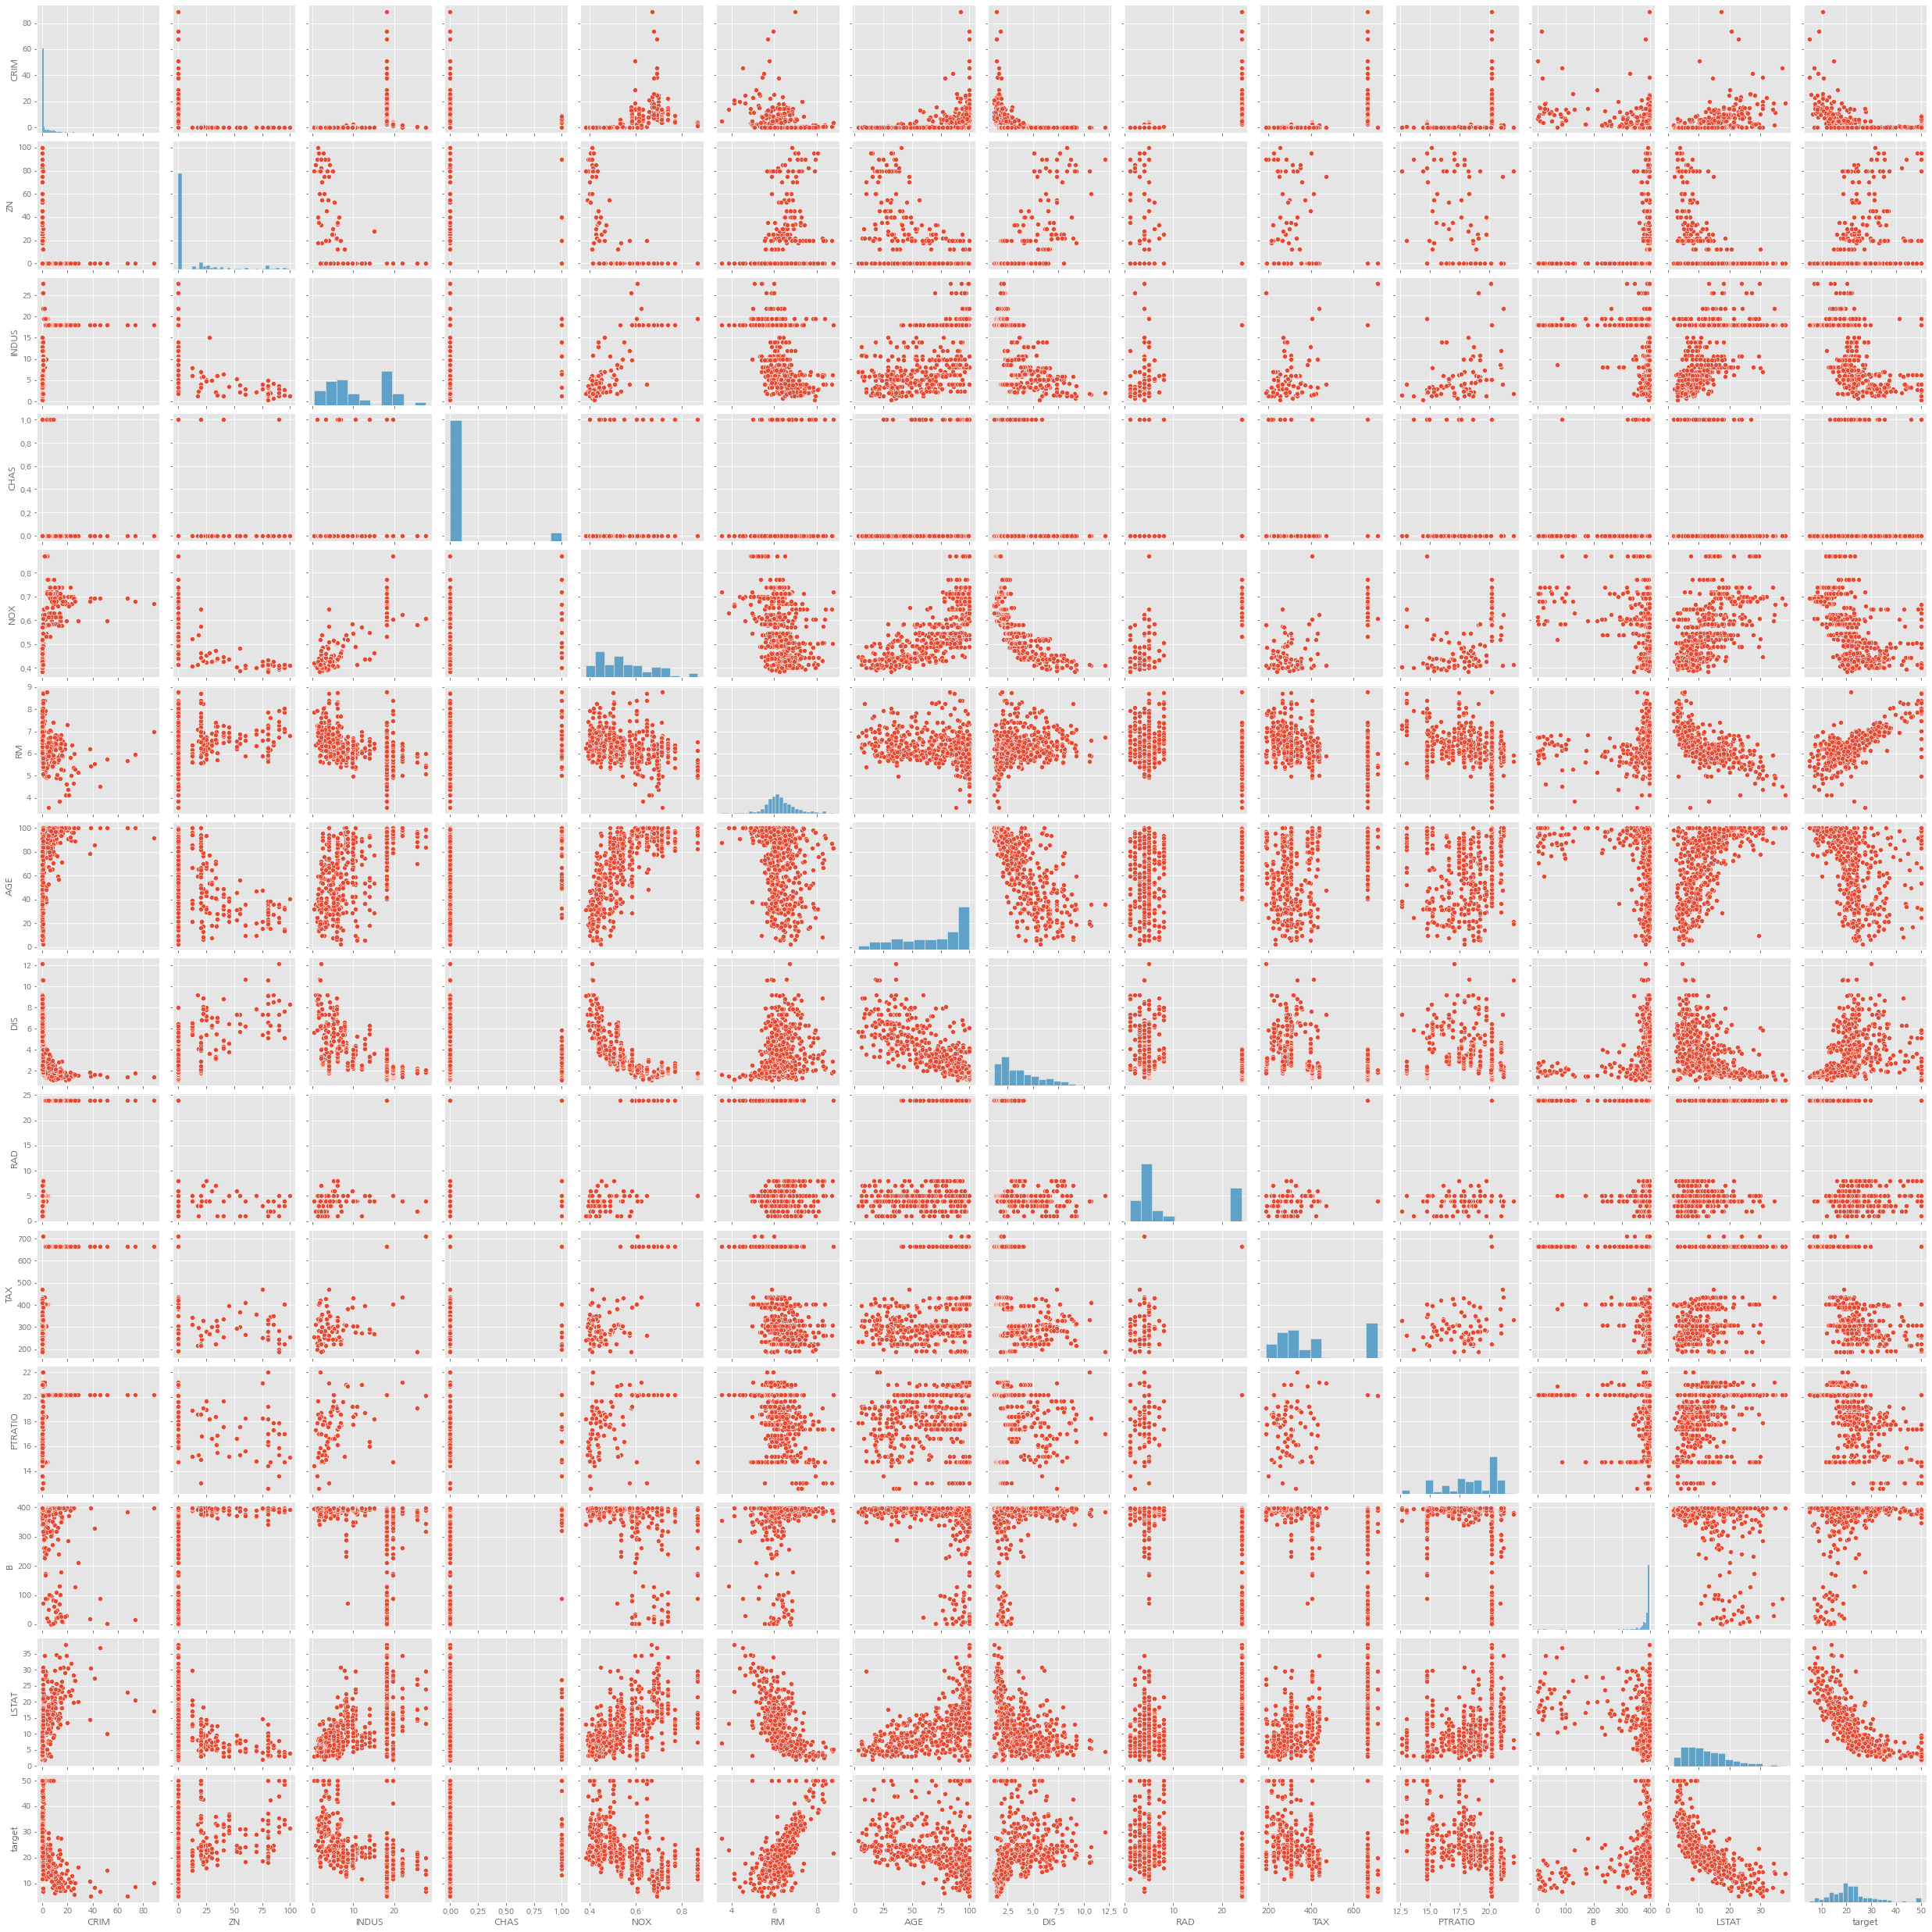

In [9]:
sns.pairplot(df_Boston)

C:\Users\13a71\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13a71\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

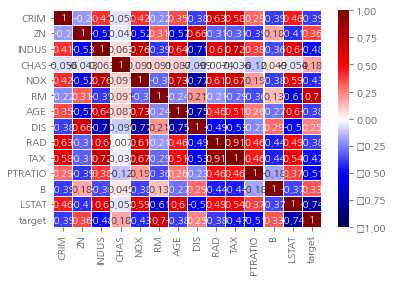

In [10]:
plt.figsize = (200,160)
sns.heatmap(df_Boston.corr(), vmin=-1, vmax = 1, annot = True, linewidths= 0.2, cmap = 'seismic')

# boston data set을 tf, keras

- feature data 0번째 행의 값의 주택 중위가격을 

## tf 

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam

In [12]:
x_data = df.iloc[:,:-1].values

In [13]:
x_data = df_Boston.iloc[:,:-1].values  
y_data = df_Boston.target.values   

In [14]:
x_data.shape

(506, 13)

In [15]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

In [16]:
w = tf.Variable(tf.random.uniform([13,1])) # [특성데이터, 라벨의 수]
b = tf.Variable(tf.random.uniform([1]))

In [17]:
def compute_loss():
    hx = tf.matmul(x, w) + b
    cost = tf.reduce_mean((hx - y) **2)
    return cost

In [18]:
optimizer = Adam(0.1)
hist_cost = []

for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [w, b])
    cost = compute_loss().numpy()
    hist_cost.append(cost)      
    print(i, "cost =", compute_loss().numpy())

0 cost = 98966.23
1 cost = 50186.957
2 cost = 18948.135
3 cost = 3866.4065
4 cost = 2029.474
5 cost = 8878.377
6 cost = 18984.438
7 cost = 27619.7
8 cost = 32038.875
9 cost = 31646.602
10 cost = 27347.275
11 cost = 20753.648
12 cost = 13591.862
13 cost = 7330.0103
14 cost = 2966.0688
15 cost = 928.069
16 cost = 1074.4459
17 cost = 2798.9905
18 cost = 5231.0034
19 cost = 7485.4434
20 cost = 8888.966
21 cost = 9114.813
22 cost = 8200.923
23 cost = 6470.9766
24 cost = 4401.905
25 cost = 2481.5586
26 cost = 1089.0396
27 cost = 418.357
28 cost = 455.9078
29 cost = 1011.909
30 cost = 1793.9485
31 cost = 2499.6804
32 cost = 2900.6294
33 cost = 2893.7327
34 cost = 2510.0
35 cost = 1884.3322
36 cost = 1201.1626
37 cost = 634.7015
38 cost = 300.84
39 cost = 232.29768
40 cost = 381.05884
41 cost = 644.2007
42 cost = 902.7248
43 cost = 1059.9806
44 cost = 1067.7853
45 cost = 933.70593
46 cost = 709.8765
47 cost = 469.53778
48 cost = 280.44244
49 cost = 183.94218
50 cost = 185.60823
51 cost = 258.8

412 cost = 88.966385
413 cost = 88.9531
414 cost = 88.93989
415 cost = 88.92676
416 cost = 88.91371
417 cost = 88.90075
418 cost = 88.88786
419 cost = 88.875046
420 cost = 88.862305
421 cost = 88.849655
422 cost = 88.83707
423 cost = 88.82456
424 cost = 88.812126
425 cost = 88.79978
426 cost = 88.7875
427 cost = 88.7753
428 cost = 88.76315
429 cost = 88.7511
430 cost = 88.739105
431 cost = 88.727196
432 cost = 88.71535
433 cost = 88.703575
434 cost = 88.691864
435 cost = 88.68022
436 cost = 88.66866
437 cost = 88.657166
438 cost = 88.64573
439 cost = 88.63437
440 cost = 88.623085
441 cost = 88.61185
442 cost = 88.60069
443 cost = 88.58959
444 cost = 88.578545
445 cost = 88.56759
446 cost = 88.55669
447 cost = 88.54583
448 cost = 88.535065
449 cost = 88.524345
450 cost = 88.5137
451 cost = 88.503105
452 cost = 88.49258
453 cost = 88.48211
454 cost = 88.47172
455 cost = 88.46136
456 cost = 88.45107
457 cost = 88.44083
458 cost = 88.43067
459 cost = 88.42055
460 cost = 88.41051
461 cost =

830 cost = 86.647125
831 cost = 86.644936
832 cost = 86.64273
833 cost = 86.64054
834 cost = 86.63836
835 cost = 86.636185
836 cost = 86.634
837 cost = 86.63185
838 cost = 86.62969
839 cost = 86.62753
840 cost = 86.625404
841 cost = 86.62325
842 cost = 86.62113
843 cost = 86.618996
844 cost = 86.61688
845 cost = 86.61478
846 cost = 86.61267
847 cost = 86.61058
848 cost = 86.60847
849 cost = 86.60639
850 cost = 86.60431
851 cost = 86.602234
852 cost = 86.60017
853 cost = 86.598114
854 cost = 86.59604
855 cost = 86.59399
856 cost = 86.59196
857 cost = 86.58992
858 cost = 86.587875
859 cost = 86.58584
860 cost = 86.583824
861 cost = 86.58181
862 cost = 86.57981
863 cost = 86.57781
864 cost = 86.5758
865 cost = 86.5738
866 cost = 86.57183
867 cost = 86.56984
868 cost = 86.56786
869 cost = 86.565895
870 cost = 86.563934
871 cost = 86.56198
872 cost = 86.56002
873 cost = 86.558075
874 cost = 86.55614
875 cost = 86.5542
876 cost = 86.55228
877 cost = 86.550354
878 cost = 86.54843
879 cost = 8

In [19]:
min(hist_cost)

86.34979

In [20]:
def hxfn(xdata):
    xdata = tf.constant(xdata, tf.float32)
    hx = tf.matmul(xdata, w) + b
    return hx.numpy()

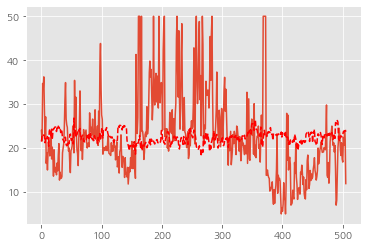

In [21]:
plt.plot( y_data)
plt.plot( hxfn( x_data) ,'r--')
plt.show()

In [22]:
w

<tf.Variable 'Variable:0' shape=(13, 1) dtype=float32, numpy=
array([[ 0.01404465],
       [ 0.01231362],
       [-0.01470375],
       [ 0.841149  ],
       [ 0.83464867],
       [ 0.5860628 ],
       [ 0.02675792],
       [ 0.37380394],
       [-0.15064041],
       [ 0.00752348],
       [ 0.5537266 ],
       [ 0.00642641],
       [ 0.02423939]], dtype=float32)>

In [23]:
hxfn(df_Boston.iloc[[0], :-1])

array([[21.473124]], dtype=float32)

## Keras 

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [25]:
w = tf.Variable(tf.random.uniform([13,1])) # [특성데이터, 라벨의 수]
b = tf.Variable(tf.random.uniform([1]))

In [26]:
x_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [27]:
dense = Dense( units =1, input_dim = 13) # #feature만큼 넣어야 한다.
model = Sequential( [dense] )
model.compile(loss = 'mse', optimizer = Adam(0.1))
h = model.fit(x_data, y_data, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 625us/step - loss: 7721.3975
Epoch 2/1000
16/16 [==============================] - 0s 500us/step - loss: 1157.1337
Epoch 3/1000
16/16 [==============================] - 0s 500us/step - loss: 237.1557
Epoch 4/1000
16/16 [==============================] - 0s 438us/step - loss: 173.1884
Epoch 5/1000
16/16 [==============================] - 0s 563us/step - loss: 131.6248
Epoch 6/1000
16/16 [==============================] - 0s 500us/step - loss: 101.7325
Epoch 7/1000
16/16 [==============================] - 0s 500us/step - loss: 95.2097
Epoch 8/1000
16/16 [==============================] - 0s 500us/step - loss: 76.4055
Epoch 9/1000
16/16 [==============================] - 0s 563us/step - loss: 68.8904
Epoch 10/1000
16/16 [==============================] - 0s 438us/step - loss: 63.4619
Epoch 11/1000
16/16 [==============================] - 0s 437us/step - loss: 66.5893
Epoch 12/1000
16/16 [==============================] - 0s 563us/st

16/16 [==============================] - 0s 563us/step - loss: 66.1896
Epoch 98/1000
16/16 [==============================] - 0s 563us/step - loss: 42.5020
Epoch 99/1000
16/16 [==============================] - 0s 563us/step - loss: 81.6962
Epoch 100/1000
16/16 [==============================] - 0s 625us/step - loss: 62.2164
Epoch 101/1000
16/16 [==============================] - 0s 563us/step - loss: 40.2679
Epoch 102/1000
16/16 [==============================] - 0s 500us/step - loss: 34.7788
Epoch 103/1000
16/16 [==============================] - 0s 500us/step - loss: 32.3283
Epoch 104/1000
16/16 [==============================] - 0s 500us/step - loss: 44.3499
Epoch 105/1000
16/16 [==============================] - 0s 688us/step - loss: 75.9987
Epoch 106/1000
16/16 [==============================] - 0s 625us/step - loss: 66.2977
Epoch 107/1000
16/16 [==============================] - 0s 563us/step - loss: 30.1852
Epoch 108/1000
16/16 [==============================] - 0s 563us/step -

16/16 [==============================] - 0s 438us/step - loss: 34.3139
Epoch 193/1000
16/16 [==============================] - 0s 500us/step - loss: 34.9290
Epoch 194/1000
16/16 [==============================] - 0s 500us/step - loss: 37.4564
Epoch 195/1000
16/16 [==============================] - 0s 500us/step - loss: 97.9551
Epoch 196/1000
16/16 [==============================] - 0s 563us/step - loss: 48.0333
Epoch 197/1000
16/16 [==============================] - 0s 500us/step - loss: 37.7825
Epoch 198/1000
16/16 [==============================] - 0s 563us/step - loss: 30.6477
Epoch 199/1000
16/16 [==============================] - 0s 500us/step - loss: 36.1450
Epoch 200/1000
16/16 [==============================] - 0s 500us/step - loss: 49.2535
Epoch 201/1000
16/16 [==============================] - 0s 500us/step - loss: 31.6953
Epoch 202/1000
16/16 [==============================] - 0s 438us/step - loss: 35.5844
Epoch 203/1000
16/16 [==============================] - 0s 500us/step

16/16 [==============================] - 0s 433us/step - loss: 58.7854
Epoch 288/1000
16/16 [==============================] - 0s 499us/step - loss: 32.4895
Epoch 289/1000
16/16 [==============================] - 0s 375us/step - loss: 65.9407
Epoch 290/1000
16/16 [==============================] - 0s 438us/step - loss: 69.0543
Epoch 291/1000
16/16 [==============================] - 0s 438us/step - loss: 34.9837
Epoch 292/1000
16/16 [==============================] - 0s 438us/step - loss: 30.5654
Epoch 293/1000
16/16 [==============================] - 0s 438us/step - loss: 26.3748
Epoch 294/1000
16/16 [==============================] - 0s 438us/step - loss: 34.7452
Epoch 295/1000
16/16 [==============================] - 0s 499us/step - loss: 31.1736
Epoch 296/1000
16/16 [==============================] - 0s 499us/step - loss: 47.9118
Epoch 297/1000
16/16 [==============================] - 0s 500us/step - loss: 28.9401
Epoch 298/1000
16/16 [==============================] - 0s 437us/step

16/16 [==============================] - 0s 563us/step - loss: 33.1969
Epoch 383/1000
16/16 [==============================] - 0s 563us/step - loss: 34.6221
Epoch 384/1000
16/16 [==============================] - 0s 438us/step - loss: 35.2127
Epoch 385/1000
16/16 [==============================] - 0s 563us/step - loss: 37.3627
Epoch 386/1000
16/16 [==============================] - 0s 500us/step - loss: 61.2020
Epoch 387/1000
16/16 [==============================] - 0s 438us/step - loss: 50.0381
Epoch 388/1000
16/16 [==============================] - 0s 438us/step - loss: 34.5312
Epoch 389/1000
16/16 [==============================] - 0s 500us/step - loss: 25.3744
Epoch 390/1000
16/16 [==============================] - 0s 438us/step - loss: 28.3539
Epoch 391/1000
16/16 [==============================] - 0s 500us/step - loss: 42.3804
Epoch 392/1000
16/16 [==============================] - 0s 500us/step - loss: 71.8465
Epoch 393/1000
16/16 [==============================] - 0s 438us/step

16/16 [==============================] - 0s 625us/step - loss: 25.3786
Epoch 478/1000
16/16 [==============================] - 0s 563us/step - loss: 28.6147
Epoch 479/1000
16/16 [==============================] - 0s 625us/step - loss: 39.1466
Epoch 480/1000
16/16 [==============================] - 0s 688us/step - loss: 29.1429
Epoch 481/1000
16/16 [==============================] - 0s 625us/step - loss: 29.6794
Epoch 482/1000
16/16 [==============================] - 0s 625us/step - loss: 45.4133
Epoch 483/1000
16/16 [==============================] - 0s 563us/step - loss: 44.5344
Epoch 484/1000
16/16 [==============================] - 0s 750us/step - loss: 68.8694
Epoch 485/1000
16/16 [==============================] - 0s 563us/step - loss: 53.3877
Epoch 486/1000
16/16 [==============================] - 0s 625us/step - loss: 54.3590
Epoch 487/1000
16/16 [==============================] - 0s 626us/step - loss: 34.3207
Epoch 488/1000
16/16 [==============================] - 0s 625us/step

16/16 [==============================] - 0s 563us/step - loss: 28.2037
Epoch 573/1000
16/16 [==============================] - 0s 500us/step - loss: 44.0646
Epoch 574/1000
16/16 [==============================] - 0s 563us/step - loss: 58.8700
Epoch 575/1000
16/16 [==============================] - 0s 563us/step - loss: 35.4290
Epoch 576/1000
16/16 [==============================] - 0s 500us/step - loss: 30.5357
Epoch 577/1000
16/16 [==============================] - 0s 563us/step - loss: 48.2842
Epoch 578/1000
16/16 [==============================] - 0s 563us/step - loss: 56.3563
Epoch 579/1000
16/16 [==============================] - 0s 563us/step - loss: 35.0322
Epoch 580/1000
16/16 [==============================] - 0s 500us/step - loss: 43.2623
Epoch 581/1000
16/16 [==============================] - 0s 500us/step - loss: 37.0570
Epoch 582/1000
16/16 [==============================] - 0s 438us/step - loss: 47.3932
Epoch 583/1000
16/16 [==============================] - 0s 438us/step

16/16 [==============================] - 0s 500us/step - loss: 63.6775
Epoch 668/1000
16/16 [==============================] - 0s 500us/step - loss: 43.6757
Epoch 669/1000
16/16 [==============================] - 0s 500us/step - loss: 66.3177
Epoch 670/1000
16/16 [==============================] - 0s 500us/step - loss: 75.6349
Epoch 671/1000
16/16 [==============================] - 0s 500us/step - loss: 56.6832
Epoch 672/1000
16/16 [==============================] - 0s 438us/step - loss: 52.5407
Epoch 673/1000
16/16 [==============================] - 0s 438us/step - loss: 42.9365
Epoch 674/1000
16/16 [==============================] - 0s 438us/step - loss: 52.6083
Epoch 675/1000
16/16 [==============================] - 0s 438us/step - loss: 30.8653
Epoch 676/1000
16/16 [==============================] - 0s 500us/step - loss: 31.3183
Epoch 677/1000
16/16 [==============================] - 0s 500us/step - loss: 37.9697
Epoch 678/1000
16/16 [==============================] - 0s 500us/step

16/16 [==============================] - 0s 438us/step - loss: 79.0779
Epoch 763/1000
16/16 [==============================] - 0s 500us/step - loss: 74.6495
Epoch 764/1000
16/16 [==============================] - 0s 375us/step - loss: 35.0756
Epoch 765/1000
16/16 [==============================] - 0s 438us/step - loss: 36.1887
Epoch 766/1000
16/16 [==============================] - 0s 500us/step - loss: 34.2387
Epoch 767/1000
16/16 [==============================] - 0s 438us/step - loss: 42.8151
Epoch 768/1000
16/16 [==============================] - 0s 438us/step - loss: 44.1479
Epoch 769/1000
16/16 [==============================] - 0s 438us/step - loss: 45.6661
Epoch 770/1000
16/16 [==============================] - 0s 563us/step - loss: 75.7263
Epoch 771/1000
16/16 [==============================] - 0s 500us/step - loss: 27.0943
Epoch 772/1000
16/16 [==============================] - 0s 563us/step - loss: 31.3522
Epoch 773/1000
16/16 [==============================] - 0s 500us/step

16/16 [==============================] - 0s 500us/step - loss: 42.4063
Epoch 858/1000
16/16 [==============================] - 0s 438us/step - loss: 47.6382
Epoch 859/1000
16/16 [==============================] - 0s 625us/step - loss: 38.5783
Epoch 860/1000
16/16 [==============================] - 0s 500us/step - loss: 32.1656
Epoch 861/1000
16/16 [==============================] - 0s 563us/step - loss: 30.4902
Epoch 862/1000
16/16 [==============================] - 0s 438us/step - loss: 66.6970
Epoch 863/1000
16/16 [==============================] - 0s 438us/step - loss: 38.7345
Epoch 864/1000
16/16 [==============================] - 0s 500us/step - loss: 34.0286
Epoch 865/1000
16/16 [==============================] - 0s 438us/step - loss: 51.7807
Epoch 866/1000
16/16 [==============================] - 0s 563us/step - loss: 105.9825
Epoch 867/1000
16/16 [==============================] - 0s 438us/step - loss: 65.7039
Epoch 868/1000
16/16 [==============================] - 0s 438us/ste

16/16 [==============================] - 0s 438us/step - loss: 37.9471
Epoch 953/1000
16/16 [==============================] - 0s 438us/step - loss: 31.7120
Epoch 954/1000
16/16 [==============================] - 0s 563us/step - loss: 38.7577
Epoch 955/1000
16/16 [==============================] - 0s 500us/step - loss: 39.7813
Epoch 956/1000
16/16 [==============================] - 0s 500us/step - loss: 32.6924
Epoch 957/1000
16/16 [==============================] - 0s 500us/step - loss: 37.7554
Epoch 958/1000
16/16 [==============================] - 0s 500us/step - loss: 47.2112
Epoch 959/1000
16/16 [==============================] - 0s 437us/step - loss: 48.3191
Epoch 960/1000
16/16 [==============================] - 0s 438us/step - loss: 47.7255
Epoch 961/1000
16/16 [==============================] - 0s 500us/step - loss: 32.9186
Epoch 962/1000
16/16 [==============================] - 0s 500us/step - loss: 57.4531
Epoch 963/1000
16/16 [==============================] - 0s 500us/step

In [28]:
w,b = dense.get_weights()

In [29]:
w, b

(array([[-0.1419653 ],
        [ 0.06991119],
        [-0.04616541],
        [ 3.429817  ],
        [-7.0795956 ],
        [ 4.9624867 ],
        [-0.01781984],
        [-1.1172851 ],
        [ 0.32165647],
        [-0.02431088],
        [-0.6078145 ],
        [ 0.01302422],
        [-0.44571173]], dtype=float32),
 array([15.454534], dtype=float32))

In [30]:
hxfn(df_Boston.iloc[[0], :-1])

array([[26.469112]], dtype=float32)

C:\Users\13a71\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13a71\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


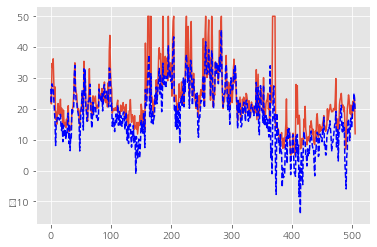

In [31]:
plt.plot( y)
plt.plot( hxfn( x) ,'b--')
plt.show()

# crime data

In [38]:
crime_df = pd.read_csv('~/dropbox/python숙달/data/depp/crime_in_Seoul.csv', encoding="cp949", index_col='관서명')
# thousand = ','사용하면 goodness

## 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시요

In [39]:
crime_df.columns

Index(['살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생', '절도 검거',
       '폭력 발생', '폭력 검거'],
      dtype='object')

In [40]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 중부서 to 수서서
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   살인 발생   31 non-null     int64 
 1   살인 검거   31 non-null     int64 
 2   강도 발생   31 non-null     int64 
 3   강도 검거   31 non-null     int64 
 4   강간 발생   31 non-null     int64 
 5   강간 검거   31 non-null     int64 
 6   절도 발생   31 non-null     object
 7   절도 검거   31 non-null     object
 8   폭력 발생   31 non-null     object
 9   폭력 검거   31 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.7+ KB


In [41]:
crime_df.nlargest(1, "살인 발생")

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


In [42]:
crime_df.sort_values('살인 발생', ascending=False).iloc[:1,:]

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요


In [ ]:
crime_df['절도 발생'] = crime_df['절도 발생'].str.replace(r'\D+', '').astype('int')
crime_df['폭력 발생'] = crime_df['폭력 발생'].str.replace(r'\D+', '').astype('int')
crime_df['폭력 검거'] = crime_df['폭력 검거'].str.replace(r'\D+', '').astype('int')
crime_df['절도 검거'] = crime_df['절도 검거'].str.replace(r'\D+', '').astype('int')

In [ ]:

plt.figure(figsize=(16,6))
ax = sns.barplot(x="관서명", y="절도 발생", data=crime_df)

3. 절도검거율 컬럼을 추가 하시요

In [ ]:
crime_df['절도검거율'] = crime_df['절도 검거']/crime_df['절도 발생'] * 100

In [ ]:
crime_df

4. 폭력발생 top5를 구하시요( 관서명, 폭력발생, 폭력검거)m

In [ ]:
crime_df.sort_values('폭력 발생', ascending=False).iloc[:5,:][['관서명', '폭력 발생', '폭력 검거']]

상관관계 heatmap을 그리시요

In [ ]:
plt.figsize = (200,160)
sns.heatmap(crime_df.corr(), vmin=-1, vmax = 1, annot = True, linewidths= 0.2, cmap = 'seismic')

6. 살인발생과 폭력발생의 상관관계를 확인하고 살인 발생이 5건인경우 폭력발생수를 예측하시요
( 텐서버전, 케라스버전)

In [ ]:
crime_df[['살인 발생', '폭력 발생']].corr()

In [ ]:
x_data

In [ ]:
x_data = crime_df['살인 발생'].values
y_data = crime_df['폭력 발생'].values

In [ ]:
x_data

In [ ]:
w*x

In [ ]:
x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)
w = tf.Variable( tf.random.uniform( [1] ) ) #[특성데이터갯수,라벨의갯수]
b = tf.Variable( tf.random.uniform( [1] ) ) #[라벨의갯수]

In [ ]:
def compute_cost():
    hx = w*x + b
    cost = tf.reduce_mean( (hx-y)**2 )
    return cost
    

In [ ]:
optimizer = Adam(0.1)
for i in range(10000):
    optimizer.minimize(compute_cost, var_list= [w,b])
    print(i, "cost = ", compute_cost().numpy())

In [ ]:
def hxfn(xdata):
    xdata = np.array(x_data)
    xd = tf.constant( xdata, tf.float32)
    hx = xd*w + b
    return hx.numpy()

In [ ]:
w

In [ ]:
# 0행의 값
hxfn([5])

In [ ]:
plt.plot( y_data)
plt.plot( hxfn( x_data) ,'r--')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_data, hxfn( x_data))

## keras version

In [ ]:
w = tf.Variable(tf.random.uniform([1,1])) # [특성데이터, 라벨의 수]
b = tf.Variable(tf.random.uniform([1]))


dense = Dense(units=1, input_dim=1)
model = Sequential([dense])
model.compile(loss='mse', optimizer=Adam(lr=0.1))
h=model.fit(x,y, epochs=20000)

In [ ]:
w,b = dense.get_weights()

In [ ]:
model.predict([[5]])

In [ ]:
plt.plot( y_data)
plt.plot( model.predict( x_data) ,'r--')
plt.show()

In [ ]:
r2_score(y_data, model.predict( x_data))